In [1]:
import numpy as np
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.io import ascii
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.wcs import WCS
#! pip install aplpy
import aplpy

import os, sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/PythonFunctions')

SNe_Gal_File = '../Data/3.SNe+GalData.csv'
database = Table.read(SNe_Gal_File, format='csv') 
# for i in range(len(database)):
#     print(database["SN_name"][i], database["SN_percentile_2"][i])

In [2]:
# p = database["SN_percentile"]
# for i in range(len(p)):
#     if p[i] != False:
#         better = p[i][1:-1]
#         print(better)
#        # better = round(float(better),3)
#         p[i] = better
#     else:
#         p[i] = "non-detection"
# for i in range(len(database)):
#     print(database["SN_percentile_2"][i])

In [3]:

gal_groups = database.group_by('galaxy')
gals = gal_groups.groups.keys[4:]
indices = gal_groups.groups.indices[4:]
indices = indices.tolist()
indices.append(0)

# print(indices)
# print(gal_groups["SN_name"][4])

images, errFiles, name, types, ras, decs, percentiles = [],[],[],[],[],[],[]
for i in range(len(indices)-2):
    SNnames, SNtypes, SNras, SNdecs, SNpercentiles = [],[],[],[],[]
    images.append(gal_groups["ImageFile150"][indices[i]])
    errFiles.append(gal_groups["ErrFile150"][indices[i]])
    SNnames.append(gal_groups["SN_name"][indices[i]])
    SNtypes.append(gal_groups["SN_type"][indices[i]])
    SNras.append(gal_groups["SN_ra"][indices[i]])
    SNdecs.append(gal_groups["SN_dec"][indices[i]])
    SNpercentiles.append(gal_groups["SN_percentile_2"][indices[i]])
    j = 1
    while(indices[i] + j < indices[i+1]):
        SNnames.append(gal_groups["SN_name"][indices[i]+j])
        SNtypes.append(gal_groups["SN_type"][indices[i]+j])
        SNras.append(gal_groups["SN_ra"][indices[i]+j])
        SNdecs.append(gal_groups["SN_dec"][indices[i]+j])
        SNpercentiles.append(gal_groups["SN_percentile_2"][indices[i]+j])
        j += 1
    name.append(SNnames)
    types.append(SNtypes)
    ras.append(SNras)
    decs.append(SNdecs)
    percentiles.append(SNpercentiles)
    
  

In [4]:
# set up plots, wcs information, and ake sigma maps for contours.
import matplotlib.pyplot as plt
plots, sigma, wcss, hdus = [],[],[],[]

for i in range(len(gals)):
    if os.path.isfile(images[i]):
        co_hdu = pyfits.open(images[i])
        hdus.append(co_hdu)
        co_map = co_hdu[0].data
        plots.append(co_map)
        err_hdu = pyfits.open(errFiles[i])
        err_map = err_hdu[0].data
        sig_map = co_map / err_map
        sigma.append(sig_map)
        wcss.append(WCS(co_hdu[0].header, naxis=2))



In [5]:
#print(name)
percentiles = [['0.98'], ['0.99'], ['non-detection'], ['non-detection', 'non-detection'], ['0.9'], ['0.99', 'non-detection'], ['0.24', 'non-detection', 'non-detection'], ['non-detection'], ['0.1'], ['0.84', 'non-detection', 'non-detection', '0.31'], ['0.98', '0.84'], ['0.76'], ['non-detection'], ['1.0', '0.93'], ['non-detection'], ['0.7', '0.9', '0.43', '0.99', '0.4'], ['0.82', '0.17', '0.75', '0.98'], ['non-detection', 'non-detection', 'non-detection', '0.43', 'non-detection', 'non-detection', 'non-detection'], ['0.56', '0.92', 'non-detection', 'non-detection', 'non-detection', '0.93'], ['non-detection'], ['0.75'], ['non-detection', 'non-detection'], ['non-detection'], ['0.93'], ['0.65', '0.95'], ['0.39', '0.99', '0.96', '1.0', '0.21'], ['0.44'], ['0.8'], ['non-detection']]

In [6]:
legendLabels = []

for i in range(len(name)):
    legendlabel = []
    if len(name[i]) > 1:
        for k in range(len(name[i])):  
            percen = percentiles[i][k]
            per = str(percen)
            label = name[i][k] + " " + types[i][k] + " " + str(percentiles[i][k])
            legendlabel.append(label)
    else:
        #print(name[i][0], types[i][0], percentiles[i][0])
        legendlabel.append(name[i][0] + " " + types[i][0] + " " + str(percentiles[i][0]))
    legendLabels.append(legendlabel)
# print(legendLabels)

<ipython-input-14-775c925c7e3b>:10: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-14-775c925c7e3b>:10: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


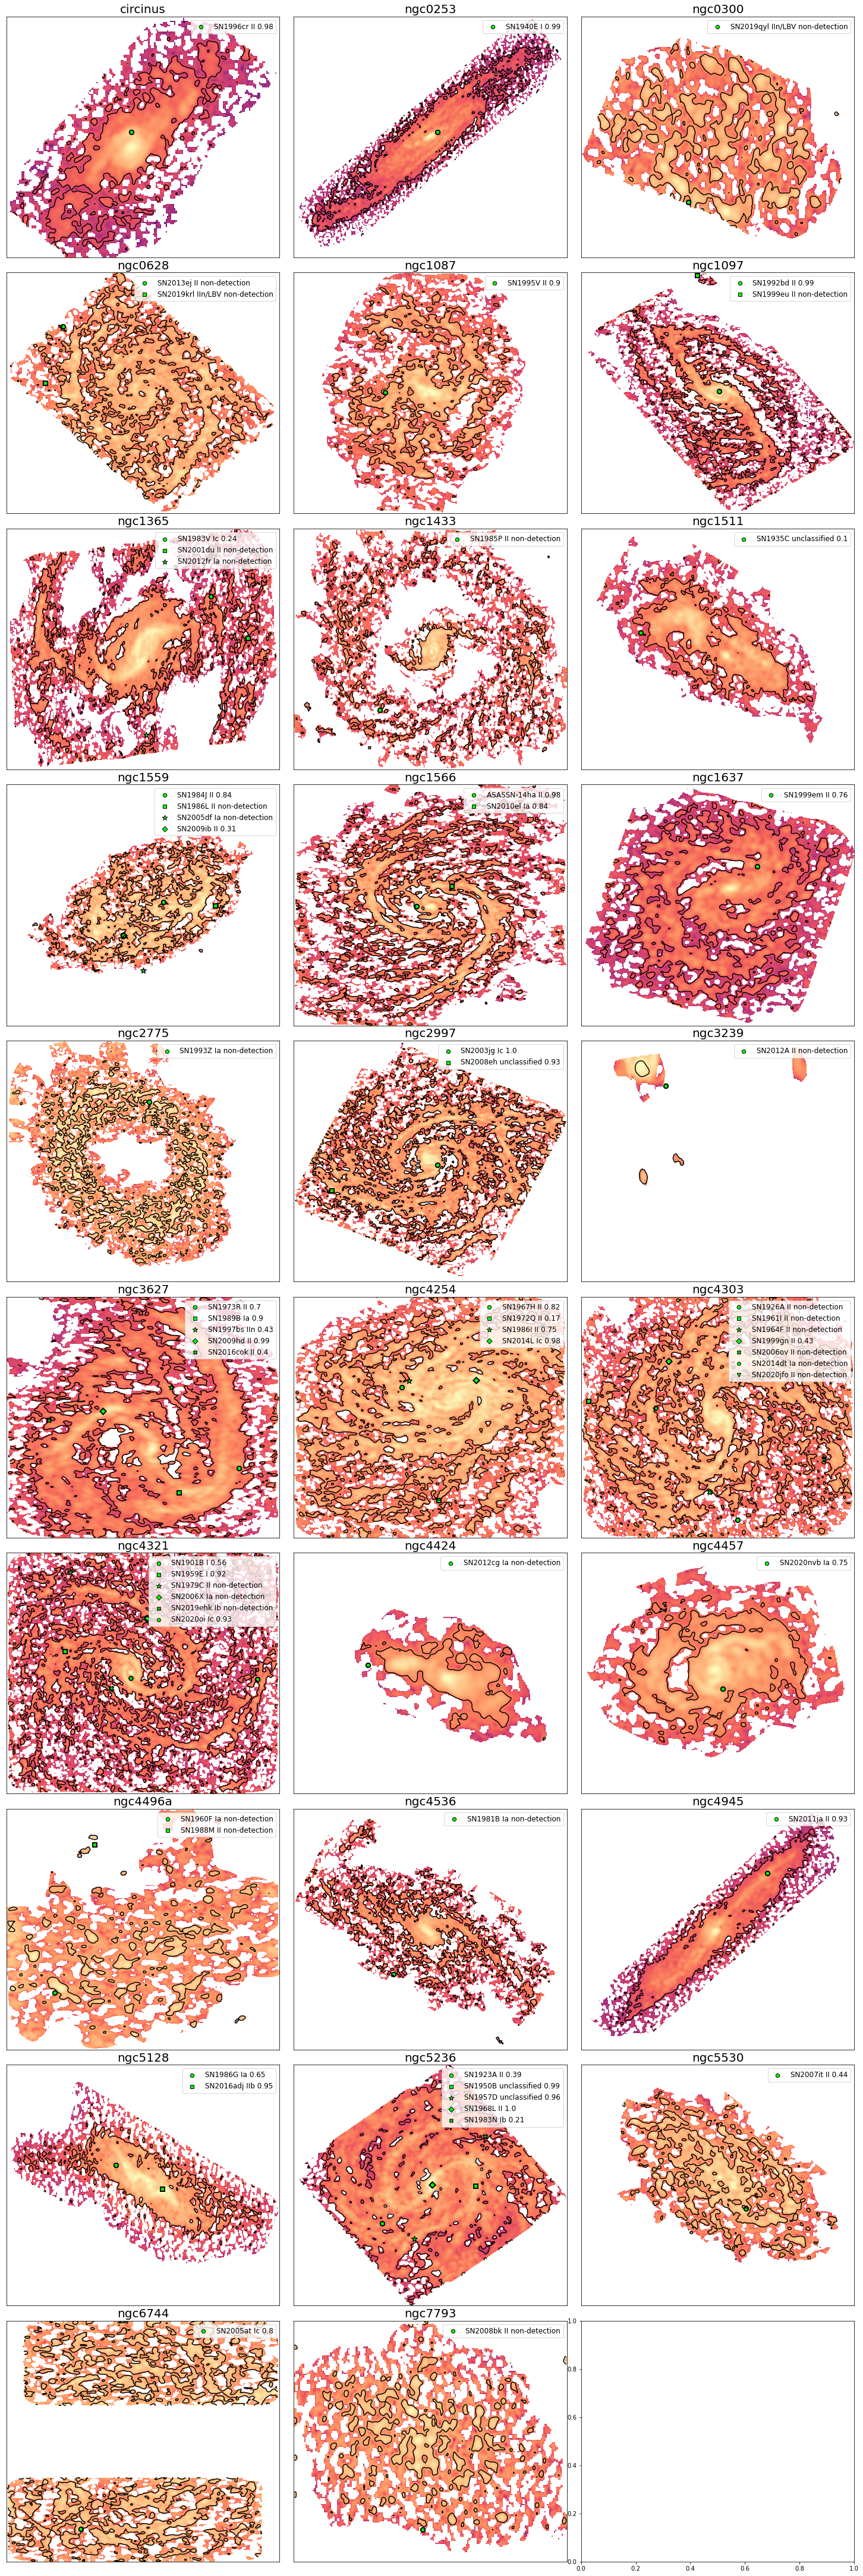

In [14]:
markerShapes = ["o", "s", "*", "D", "X", "H", "v"]
markerSizes  = [40,40,80,40,40,40,40]

import math
i,j,m=0,0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(plots)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
for plot in plots:
    xArr, yArr = wcss[m].wcs_world2pix(ras[m],decs[m],0)
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap="magma", aspect='auto')
    axs[i][j].set_title(gals[m][0], fontsize=20)
    axs[i][j].contour(sigma[m], [3], colors = ["black"], linestyles = ("-"))
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    for n in range(len(decs[m])):
        axs[i][j].scatter(xArr[n], yArr[n], color = "black", marker = markerShapes[n], s = markerSizes[n]+30)
        axs[i][j].scatter(xArr[n], yArr[n], color = "lime", marker = markerShapes[n], s = markerSizes[n], edgecolor="black", label = legendLabels[m][n])
    axs[i][j].legend(loc="best", fontsize=12)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m +=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllSNeInGalaxies.png", dpi=300)
   

print()

In [8]:
print(name)
print(types)
print(percentiles)

[['SN1996cr'], ['SN1940E'], ['SN2019qyl'], ['SN2013ej', 'SN2019krl'], ['SN1995V'], ['SN1992bd', 'SN1999eu'], ['SN1983V', 'SN2001du', 'SN2012fr'], ['SN1985P'], ['SN1935C'], ['SN1984J', 'SN1986L', 'SN2005df', 'SN2009ib'], ['ASASSN-14ha', 'SN2010el'], ['SN1999em'], ['SN1993Z'], ['SN2003jg', 'SN2008eh'], ['SN2012A'], ['SN1973R', 'SN1989B', 'SN1997bs', 'SN2009hd', 'SN2016cok'], ['SN1967H', 'SN1972Q', 'SN1986I', 'SN2014L'], ['SN1926A', 'SN1961I', 'SN1964F', 'SN1999gn', 'SN2006ov', 'SN2014dt', 'SN2020jfo'], ['SN1901B', 'SN1959E', 'SN1979C', 'SN2006X', 'SN2019ehk', 'SN2020oi'], ['SN2012cg'], ['SN2020nvb'], ['SN1960F', 'SN1988M'], ['SN1981B'], ['SN2011ja'], ['SN1986G', 'SN2016adj'], ['SN1923A', 'SN1950B', 'SN1957D', 'SN1968L', 'SN1983N'], ['SN2007it'], ['SN2005at'], ['SN2008bk']]
[['II'], ['I'], ['IIn/LBV'], ['II', 'IIn/LBV'], ['II'], ['II', 'II'], ['Ic', 'II', 'Ia'], ['II'], ['unclassified'], ['II', 'II', 'Ia', 'II'], ['II', 'Ia'], ['II'], ['Ia'], ['Ic', 'unclassified'], ['II'], ['II', 'Ia', '

In [9]:
types = ['II', 'I', 'IIn/LBV', 'II', 'IIn/LBV', 'II', 'II', 'II', 'Ic', 'II', 'Ia', 'II', 'unclassified', 'II', 'II', 'Ia', 'II', 'II', 'Ia', 'II', 'Ia', 'Ic', 'unclassified', 'II', 'II', 'Ia', 'IIn', 'II', 'II', 'II', 'II', 'II', 'Ic', 'II', 'II', 'II', 'II', 'II', 'Ia', 'II', 'I', 'I', 'II', 'Ia', 'Ib', 'Ic', 'Ia', 'Ia', 'Ia', 'II', 'Ia', 'II', 'Ia', 'IIb', 'II', 'unclassified', 'unclassified', 'II', 'Ib', 'II', 'Ic', 'II', 'II']
percentiles = ['0.98', '0.99', 'non-detection', 'non-detection', 'non-detection', '0.9', '0.99', 'non-detection', '0.24', 'non-detection', 'non-detection', 'non-detection', '0.1', '0.84', 'non-detection', 'non-detection', '0.31', '0.98', '0.84', '0.76', 'non-detection', '1.0', '0.93', 'non-detection', '0.7', '0.9', '0.43', '0.99', '0.4', '0.82', '0.17', '0.75', '0.98', 'non-detection', 'non-detection', 'non-detection', '0.43', 'non-detection', 'non-detection', 'non-detection', '0.56', '0.92', 'non-detection', 'non-detection', 'non-detection', '0.93', 'non-detection', '0.75', 'non-detection', 'non-detection', 'non-detection', '0.93', '0.65', '0.95', '0.39', '0.99', '0.96', '1.0', '0.21', '0.44', '0.8', 'non-detection', 'non-detection']
tiles = []

for i in range(len(percentiles)):
    if percentiles[i] == "non-detection":
        tiles.append(0.0)
    else:
        tiles.append(percentiles[i])

Ias, IIs, SEs, UnC, IIn = [],[],[],[],[]     
for i in range(len(types)):
    if types[i] == "I" or types[i] == "unclassified":
        UnC.append(float(tiles[i]))
    elif types[i] == "Ia":
        Ias.append(float(tiles[i]))
    elif types[i] == "II":
        IIs.append(float(tiles[i]))
    elif types[i] == "Ib" or types[i] == "Ic" or types[i] == "IIb": 
        SEs.append(float(tiles[i]))
    else:
        IIn.append(float(tiles[i]))
        
print(len(percentiles))
print(len(Ias), len(IIs), len(SEs), len(IIn), len(UnC))
    


63
12 33 8 3 7


In [10]:
Ias = np.sort(Ias)
IIs = np.sort(IIs)
SEs = np.sort(SEs)
IIn = np.sort(IIn)
UnC = np.sort(UnC)

<AxesSubplot:ylabel='Count'>

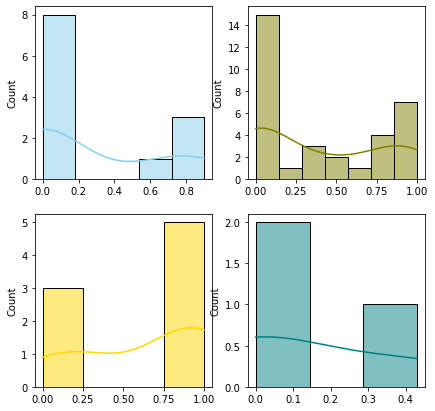

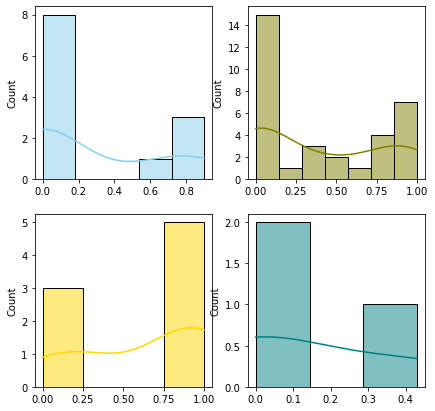

In [11]:
fig, axs = plt.subplots(2,2, figsize=(7,7))
#sns.histplot((Ias, IIs, SEs, UnC, IIn))

sns.histplot(data=Ias, kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=IIs, kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=SEs, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=IIn, kde=True, color="teal", ax=axs[1, 1])

fig, axs = plt.subplots(2,2, figsize=(7,7))
#sns.histplot((Ias, IIs, SEs, UnC, IIn))

sns.histplot(data=Ias, kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=IIs, kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=SEs, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=IIn, kde=True, color="teal", ax=axs[1, 1])

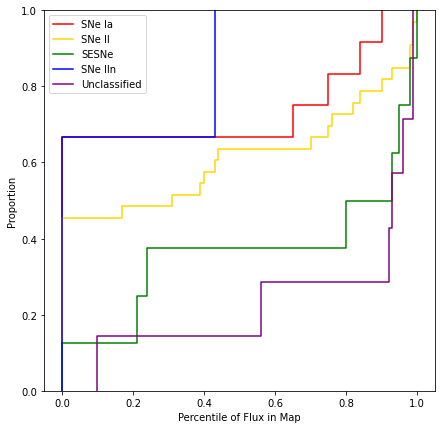

In [12]:
fig = plt.figure(figsize=(7,7))

sns.ecdfplot(data=Ias, color="red", label = "SNe Ia")
sns.ecdfplot(data=IIs, color="gold", label = "SNe II")
sns.ecdfplot(data=SEs, color="green", label = "SESNe")
sns.ecdfplot(data=IIn, color="blue", label = "SNe IIn")
sns.ecdfplot(data=UnC, color="purple", label = "Unclassified")
plt.xlabel("Percentile of Flux in Map")
plt.legend(loc="best")

In [13]:
print(UnC)

[0.1  0.56 0.92 0.93 0.96 0.99 0.99]
